In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [5]:
df.shape

(10000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [12]:
df.drop('Gender', axis=1, inplace=True)

In [13]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0.5, 1.0, 'Height V/s Weight')

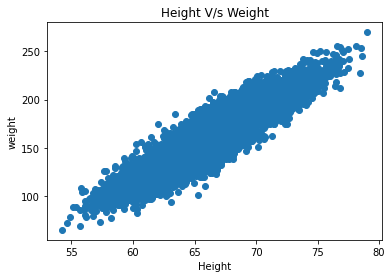

In [15]:
plt.scatter(df.Height,df.Weight)
plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Height V/s Weight')


In [16]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<AxesSubplot:>

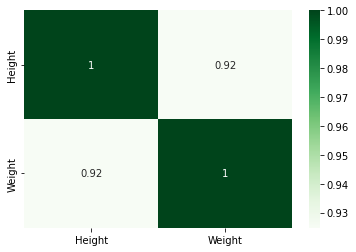

In [24]:
sns.heatmap(df.corr(), annot =True, cmap='Greens')

In [25]:
model = LinearRegression()

In [26]:
df.ndim

2

In [35]:
df.Height.values.reshape(-1,1).ndim

2

In [29]:
df.Weight.ndim

1

In [36]:
df.Height
df.Height.values.reshape(-1,1)

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [34]:
# Training the dataset
model.fit(df.Height.values.reshape(-1,1),df.Weight)

LinearRegression()

In [39]:
pred = model.predict(df.Height.values.reshape(-1,1))

In [43]:
newdf = pd.DataFrame({'Values of X':df.Height, 'actual values': df.Weight, 'predicted values':pred})

In [44]:
newdf

,Values of X,actual values,predicted values
0,73.847017,241.893563,219.161480
1,68.781904,162.310473,180.072546
2,74.110105,212.740856,221.191809
3,71.730978,220.042470,202.831401
4,69.881796,206.349801,188.560728
...,...,...,...
9995,66.172652,136.777454,159.936199
9996,67.067155,170.867906,166.839332
9997,63.867992,128.475319,142.150475
9998,69.034243,163.852461,182.019919


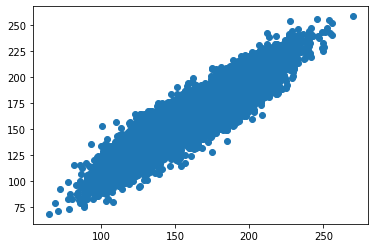

In [46]:
plt.scatter(newdf['actual values'], newdf['predicted values'])

In [48]:
newdf[['actual values','predicted values']].corr()

,actual values,predicted values
actual values,1.000000,0.924756
predicted values,0.924756,1.000000


<AxesSubplot:>

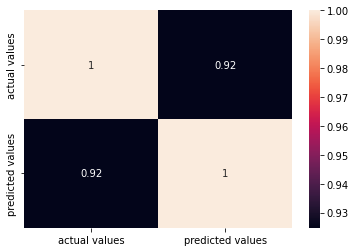

In [49]:
sns.heatmap(newdf[['actual values','predicted values']].corr(),annot=True)

In [51]:
# slope
model.coef_

array([7.71728764])

In [52]:
# intercept
model.intercept_

-350.73719181213664

In [53]:
model.predict([[74]])

array([220.34209361])

In [54]:
#y =m*x + c

y = 7.71728764 * 74 + (-350.73719181213664)

In [55]:
y

220.34209354786333

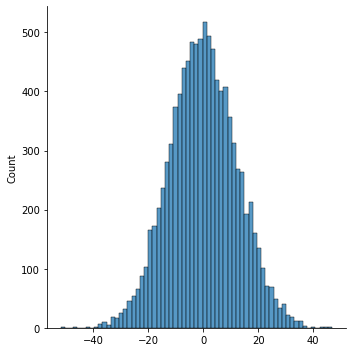

In [59]:
sns.displot(newdf['actual values'] - newdf['predicted values'])

In [60]:
r2_score(newdf['actual values'], newdf['predicted values'])

0.8551742120609958